In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import re
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Note
# I remove value less or equal to 0 or greater than 10
# I don't think "last_z_value" in KA_HD_WIN_xx" is the correct sholaing value, So I exclude them in the following calculation
#  I replace 0 to very small value (10e-31) becasue 0 should not be included in calculating Jensen-Shannon Divergence

# Preprocess

### Combine all the data

In [2]:
import os
import glob

# use glob to get all the csv files
# in the folder
path = os.getcwd() + '/data/CELRL/'
print(path)
csv_files = glob.glob(os.path.join(path, "*.csv"))

/home/cma16/shoaling/data/CELRL/


In [3]:
len(csv_files)
# there are 42 qualified files in total

41

### put data points to hist bins

In [4]:

def locate_data_to_hist(data_points):
    bin_width = 0.1
    num_bins = 100
    return np.histogram(
    data_points,
    bins=num_bins,
    range=(0, 10),
    density=True)

OK /home/cma16/shoaling/data/CELRL/OH_LD_SMT_11_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_NBG_1_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/GR_LD_GR2_3_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_OLM_8_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_SMT_13_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/GR_LD_GR1_1_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_NBG_7_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/GR_LD_GR2_8_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_OLM_7_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_NBG_11_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_JTM_10_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_SMT_14_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/GR_LD_GR1_11_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_CAI_3_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_OLM_11_avg_max_min.csv
OK /home/cma16/shoaling/data/CELRL/OH_LD_JTM_13_

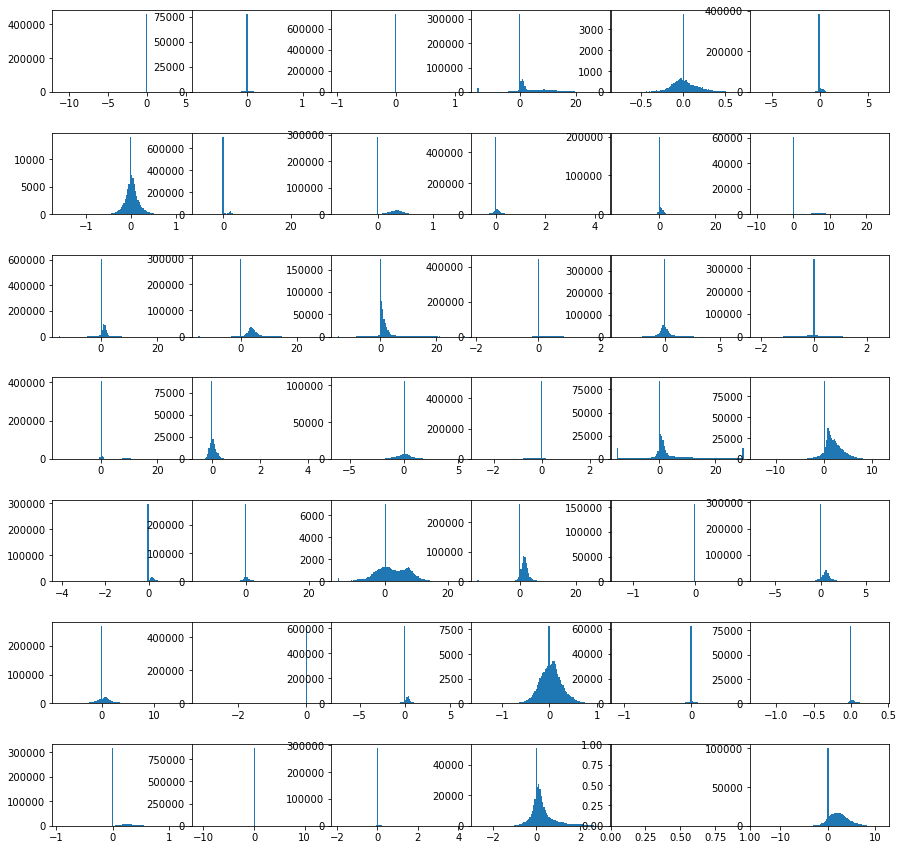

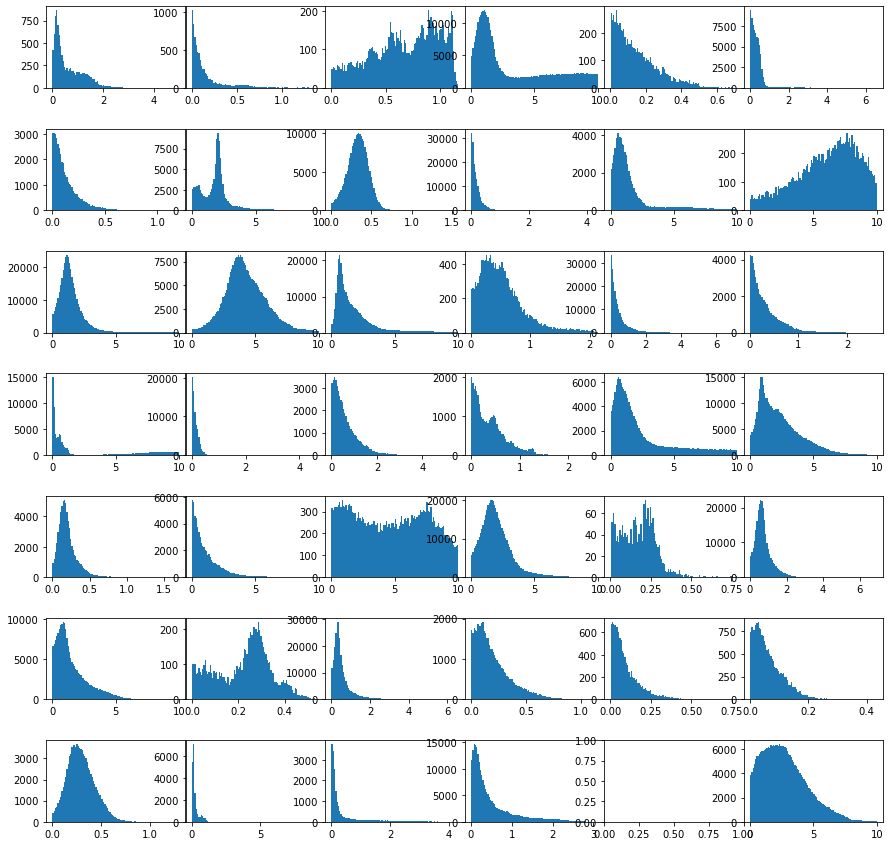

In [5]:
fig1, axs1 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
fig1.subplots_adjust(hspace = .5, wspace=.001)
axs1 = axs1.ravel()

fig2, axs2 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
fig2.subplots_adjust(hspace = .5, wspace=.001)
axs2 = axs2.ravel()

data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)
    try:
    # with 0 and negative value
        if sum(one_df['AvgRate_ftPerYr_Unfiltered']) == 0:
            print("allzero "+ f)
        else:
            axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 100)
            # without 0 and negative value
            pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
            axs2[i - 1].hist(pro_data, bins = 100)
            
            hist, edges = locate_data_to_hist(pro_data)
            subreach_name = re.split('/|_avg_max_min.csv', f)[-2]

            data_df[subreach_name] = hist
            print("OK "+f)
    except:
        print(f)
    # df_BS_GRO = df_BS_GRO.append(one_df)


In [6]:
# replace 0 with very small values
data_df.replace(0, 10e-31, inplace = True)
data_df

,OH_LD_SMT_11,OH_LD_NBG_1,GR_LD_GR2_3,OH_LD_OLM_8,OH_LD_SMT_13,GR_LD_GR1_1,OH_LD_NBG_7,GR_LD_GR2_8,OH_LD_OLM_7,OH_LD_NBG_11,...,OH_LD_JTM_12,OH_LD_JTM_7,OH_LD_OLM_5,GR_LD_GR1_5,GR_LD_GR2_5,GR_LD_GR1_3,OH_LD_NBG_12,OH_LD_JTM_2,OH_LD_MKL_1,OH_LD_NBG_8
0,0.135621,1.030959e+00,5.685273e+00,4.379562e-01,0.143646,4.430540e+00,2.011027e+00,5.432731e+00,0.243391,4.592396e-01,...,0.345880,1.993802e+00,7.383759e-01,3.249926e+00,6.590679e+00,7.861203e+00,6.712405e-01,3.032293e+00,4.212217e+00,1.909330e+00
1,0.143785,1.691623e+00,1.853366e+00,4.802151e-01,0.176919,2.724972e+00,1.705613e+00,2.511295e+00,0.261468,1.130311e+00,...,0.359346,1.565083e+00,1.101736e+00,2.805887e+00,2.240096e+00,1.931108e+00,2.003279e+00,3.560730e+00,1.961038e+00,1.931688e+00
2,0.153659,1.307163e+00,7.344488e-01,5.061468e-01,0.204512,1.557930e+00,1.506286e+00,1.103665e+00,0.265941,2.377778e+00,...,0.390662,3.828771e+00,1.561244e+00,1.701938e+00,7.822410e-01,1.587212e-01,2.879505e+00,1.134000e+00,7.989223e-01,1.341474e+00
3,0.167511,8.427762e-01,4.253417e-01,7.270457e-01,0.231004,7.677165e-01,1.375518e+00,5.173193e-01,0.276750,3.044056e+00,...,0.415349,1.992510e+00,1.727403e+00,9.875313e-01,2.877103e-01,4.502730e-02,2.305483e+00,5.677464e-01,3.854723e-01,9.287502e-01
4,0.179723,5.433023e-01,3.052753e-01,7.270457e-01,0.258365,4.049494e-01,1.252977e+00,2.487450e-01,0.281037,2.101513e+00,...,0.432155,5.927169e-01,1.226140e+00,5.822978e-01,7.905138e-02,3.939889e-03,1.310527e+00,2.746679e-01,2.688980e-01,6.710258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003210,1.000000e-30,1.000000e-30,1.000000e-30,0.061765,1.000000e-30,1.000000e-30,1.000000e-30,0.000652,1.000000e-30,...,0.000418,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
96,0.001535,1.000000e-30,1.000000e-30,1.000000e-30,0.060751,1.000000e-30,1.000000e-30,1.000000e-30,0.000745,1.000000e-30,...,0.000313,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
97,0.001291,1.000000e-30,1.000000e-30,1.000000e-30,0.062490,1.000000e-30,1.000000e-30,1.000000e-30,0.000466,1.000000e-30,...,0.000365,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
98,0.001326,1.000000e-30,1.000000e-30,1.000000e-30,0.060200,1.000000e-30,1.000000e-30,1.000000e-30,0.000559,1.000000e-30,...,0.000157,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30


In [7]:
data_df_transposed = data_df.T
data_df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
OH_LD_SMT_11,0.135621,0.143785,0.153659,0.167511,0.179723,0.188062,0.188550,0.195982,0.199611,0.202751,...,2.930832e-03,2.930832e-03,3.454195e-03,2.686596e-03,2.407469e-03,3.209959e-03,1.535198e-03,1.290962e-03,1.325853e-03,9.071624e-04
OH_LD_NBG_1,1.030959,1.691623,1.307163,0.842776,0.543302,0.426953,0.407730,0.409753,0.355119,0.338932,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
GR_LD_GR2_3,5.685273,1.853366,0.734449,0.425342,0.305275,0.343594,0.246519,0.122621,0.074084,0.049815,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
OH_LD_OLM_8,0.437956,0.480215,0.506147,0.727046,0.727046,1.034383,1.002689,0.857664,1.206300,1.276412,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
OH_LD_SMT_13,0.143646,0.176919,0.204512,0.231004,0.258365,0.291204,0.317087,0.323086,0.336158,0.342535,...,6.283767e-02,6.472164e-02,6.202611e-02,6.057690e-02,6.225798e-02,6.176525e-02,6.075081e-02,6.248986e-02,6.020011e-02,6.046096e-02


# Cluster

## Calculate Pairwise Distance

In [8]:
from scipy.spatial.distance import pdist, squareform
# calculate distance between 'OH_HD_CAM_81', 'OH_HD_BEL_2'

pdist(data_df_transposed.loc[['OH_LD_SMT_11', 'OH_LD_NBG_1']])

array([2.50003954])

In [9]:
42*41/2 # (n - 1 + 1) *( n - 1) /2 

861.0

In [10]:
len(pdist(data_df_transposed))

820

In [11]:
# calculate pairwise cosine distance
df_dist_pairwise = pd.DataFrame(
    squareform(pdist(data_df_transposed, metric='cosine')),
    columns = data_df_transposed.index,
    index = data_df_transposed.index
)

In [12]:
df_dist_pairwise.head()

,OH_LD_SMT_11,OH_LD_NBG_1,GR_LD_GR2_3,OH_LD_OLM_8,OH_LD_SMT_13,GR_LD_GR1_1,OH_LD_NBG_7,GR_LD_GR2_8,OH_LD_OLM_7,OH_LD_NBG_11,...,OH_LD_JTM_12,OH_LD_JTM_7,OH_LD_OLM_5,GR_LD_GR1_5,GR_LD_GR2_5,GR_LD_GR1_3,OH_LD_NBG_12,OH_LD_JTM_2,OH_LD_MKL_1,OH_LD_NBG_8
OH_LD_SMT_11,0.000000,0.525327,0.814193,0.533030,0.190105,0.797152,0.666109,0.820140,0.246606,0.726934,...,0.187835,0.767388,0.582506,0.758534,0.846639,0.869651,0.726968,0.761311,0.746439,0.618309
OH_LD_NBG_1,0.525327,0.000000,0.368535,0.354351,0.367935,0.223418,0.097346,0.312365,0.563308,0.270234,...,0.243002,0.181222,0.114874,0.133789,0.402327,0.494707,0.149782,0.149341,0.280051,0.041890
GR_LD_GR2_3,0.814193,0.368535,0.000000,0.719135,0.778103,0.044441,0.239310,0.010278,0.796076,0.690640,...,0.655877,0.408350,0.531213,0.112550,0.004013,0.014123,0.586014,0.149347,0.010603,0.195935
OH_LD_OLM_8,0.533030,0.354351,0.719135,0.000000,0.275743,0.702901,0.463568,0.739060,0.651504,0.533844,...,0.160802,0.645830,0.335416,0.626839,0.783775,0.819182,0.550350,0.619812,0.677649,0.443756
OH_LD_SMT_13,0.190105,0.367935,0.778103,0.275743,0.000000,0.759597,0.568092,0.791453,0.374287,0.630755,...,0.073416,0.705622,0.440519,0.700559,0.828352,0.858918,0.637656,0.697719,0.710330,0.509076


In [13]:
# plot heatmap
def plt_heatmap(df_dist_pairwise):
    plt.figure(figsize=(10,10))
    sns.heatmap(
        df_dist_pairwise,
        cmap="YlGnBu_r",
        linewidth=1
    )

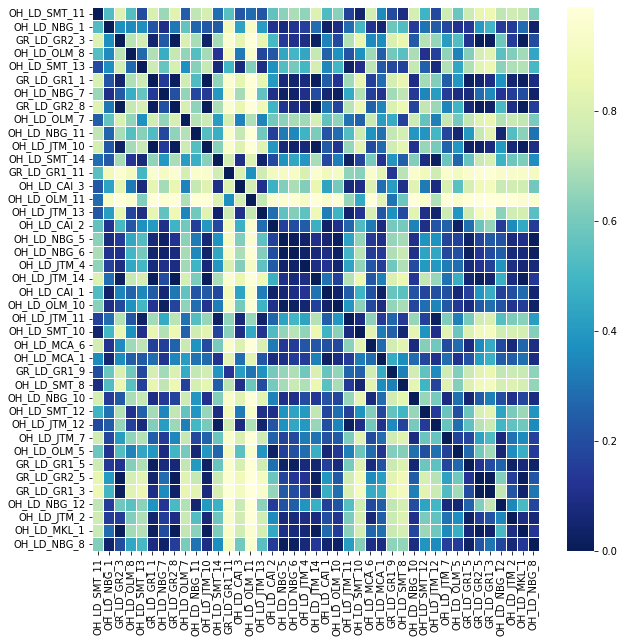

In [14]:
# plot it with seaborn
plt_heatmap(df_dist_pairwise)
# the darker, the similar

## Cluster based on Cosine similarity

In [15]:
# Elbows method to find optimal clusters
def find_n_cluster_by_elbow(df_dist_pairwise):
    cs = []
    plt.figure(figsize=(10,6))
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(df_dist_pairwise)
        cs.append(kmeans.inertia_)
    plt.plot(range(1, 15), cs)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('CS')
    plt.show()

# it seems that 3 ~ 5 cluster are reasonable

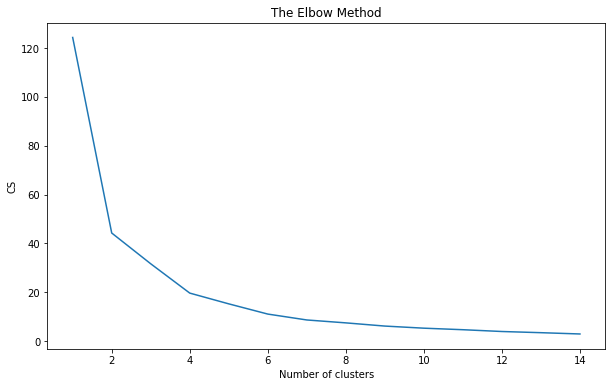

In [16]:
find_n_cluster_by_elbow(df_dist_pairwise)

### Kmeans cluster based on cosine similarity

In [17]:
def transform_by_PCA_plot(data, name):
    # transform the data to 2d to plot
    pca = PCA(2)

    #Transform the data
    transform = pca.fit_transform(data)

    #Initialize the class object
    kmeans = KMeans(n_clusters= 3)
    
    #predict the labels of clusters.
    label = kmeans.fit_predict(transform)
    
    #Getting unique labels
    u_labels = np.unique(label)
    print(label)
    print(u_labels)
    print("len(label): ", len(label))

    #plotting the results:
    plt.figure(figsize=(10,6))
    for i in u_labels:
        plt.scatter(transform[label == i , 0] , transform[label == i , 1] , label = i)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
    plt.legend()
    # plt.savefig(name + '_cluster.png')
    plt.show()
    return label

## Note: pay more attendtion to the cluster itself, the number may change
## treat the left part as cluster 0, middle part as cluster 1, and right part as cluster 2, and check if the cluster make sense to you.

[1 2 0 1 1 0 2 0 1 2 0 1 1 1 1 1 2 2 2 2 0 2 2 1 1 0 2 1 1 0 1 1 2 2 0 0 0
 2 0 0 2]
[0 1 2]
len(label):  41


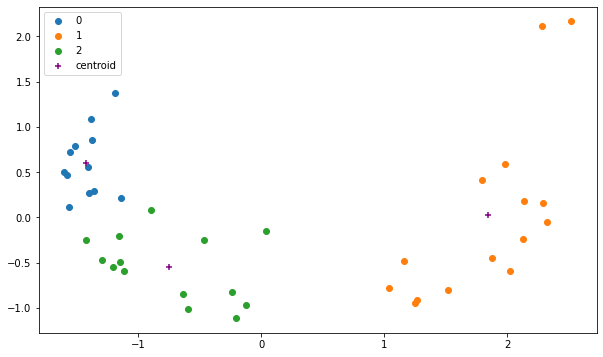

In [18]:
label = transform_by_PCA_plot(df_dist_pairwise, 'cos')
# the number may change but the cluster does not change

### Save the results from cos cluster

In [19]:
df_final = pd.DataFrame()
df_final.index = data_df_transposed.index

In [20]:
df_final['cos_cluster'] = label

In [21]:
df_final.head()

,cos_cluster
OH_LD_SMT_11,1
OH_LD_NBG_1,2
GR_LD_GR2_3,0
OH_LD_OLM_8,1
OH_LD_SMT_13,1


# Cluster by Jensen-Shannon Divergence

In [22]:
# same logic, but use Jensen-Shannon Divergence instead of cosine similarity
# calculate pairwise Jensen-Shannon Divergence
df_dist_pairwise_js = pd.DataFrame(
    squareform(pdist(data_df_transposed, metric='jensenshannon')),
    columns = data_df_transposed.index,
    index = data_df_transposed.index
)

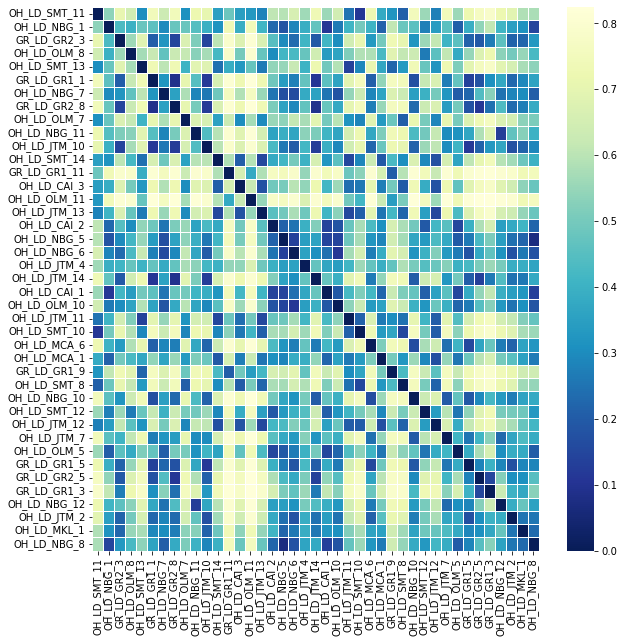

In [23]:
plt_heatmap(df_dist_pairwise_js)

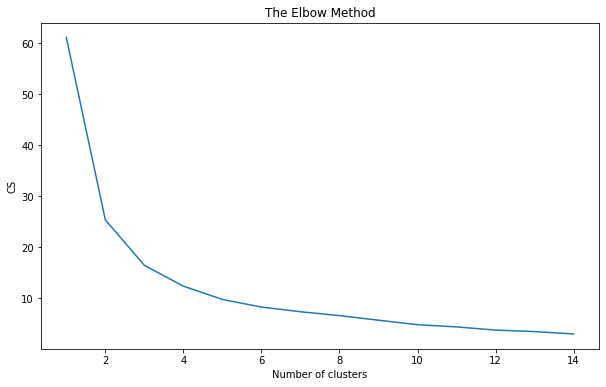

In [24]:
find_n_cluster_by_elbow(df_dist_pairwise_js)

[1 2 0 2 1 0 2 0 1 0 0 1 1 1 1 1 2 2 0 2 0 2 2 1 1 0 2 1 1 0 2 1 0 2 0 0 0
 0 0 0 2]
[0 1 2]
len(label):  41


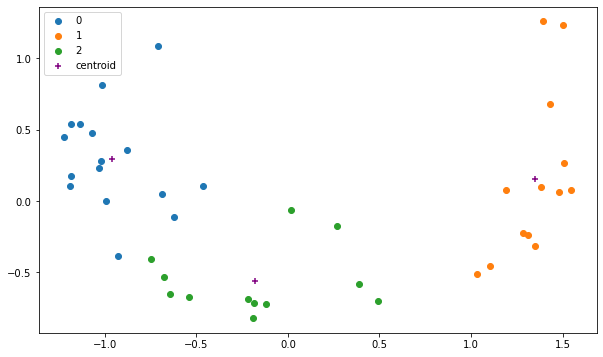

In [25]:
label = transform_by_PCA_plot(df_dist_pairwise_js, 'js')

### Save the results from Jensen-Shannon Divergence cluster

In [26]:
df_final['js_cluster'] = label

In [27]:
df_final.head()

,cos_cluster,js_cluster
OH_LD_SMT_11,1,1
OH_LD_NBG_1,2,2
GR_LD_GR2_3,0,0
OH_LD_OLM_8,1,2
OH_LD_SMT_13,1,1


## Cluster by wasserstein distance

In [28]:
# wasserstein distance
# use deepcopy!!!
df_dist_pairwise_wd = df_dist_pairwise.copy(deep = True)

In [29]:
from scipy.stats import wasserstein_distance
for mycol1 in data_df.columns:
    for mycol2 in data_df.columns:
        df_dist_pairwise_wd.loc[mycol1,mycol2] = wasserstein_distance(data_df[mycol1], data_df[mycol2])

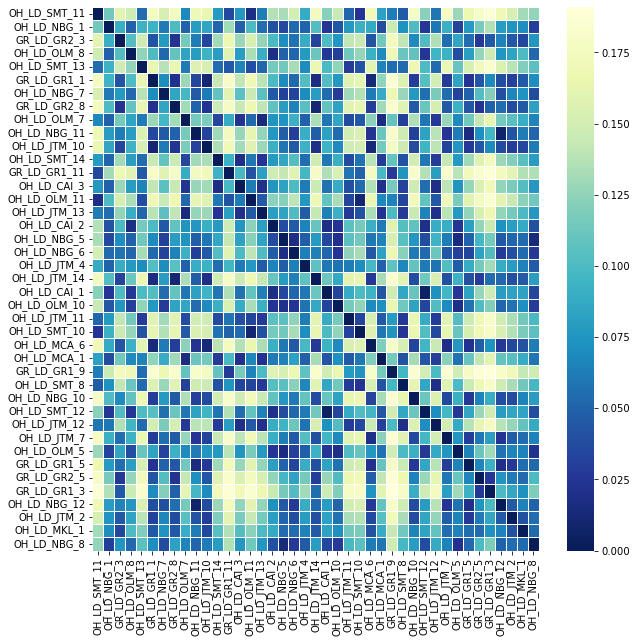

In [30]:
plt_heatmap(df_dist_pairwise_wd)

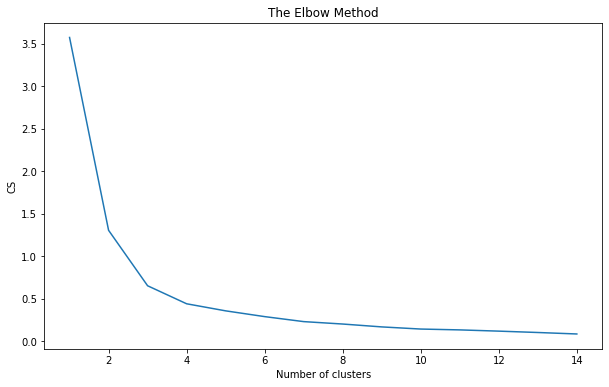

In [31]:
find_n_cluster_by_elbow(df_dist_pairwise_wd)
# 3 cluster seems to be the best!

[1 2 0 2 1 0 2 0 1 0 0 1 1 1 1 1 2 2 2 2 0 2 2 1 1 0 1 1 1 0 2 1 0 2 0 0 0
 0 0 0 2]
[0 1 2]
len(label):  41


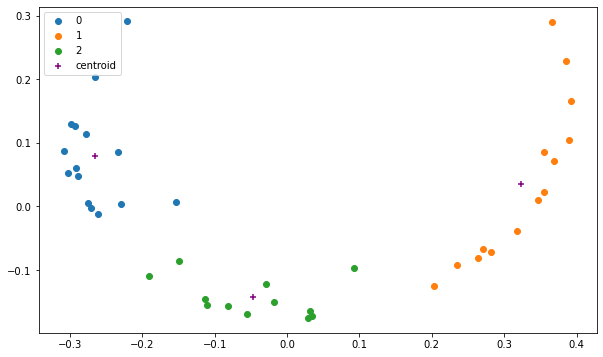

In [32]:
label = transform_by_PCA_plot(df_dist_pairwise_wd, 'wd')

### Save the results from wasserstein distance

In [33]:
df_final['wb_cluster'] = label

In [34]:
# do not care too much about the cluster number (0,1,2)
# pay more attendtion to the cluster itself!
df_final.to_csv('./cluster_res_CELRL.csv')

# Plot the data in each clusters

In [68]:
cluster_label = pd.read_csv('./res_back_up/cluster_res_CELRL.csv')

# cos_cluster

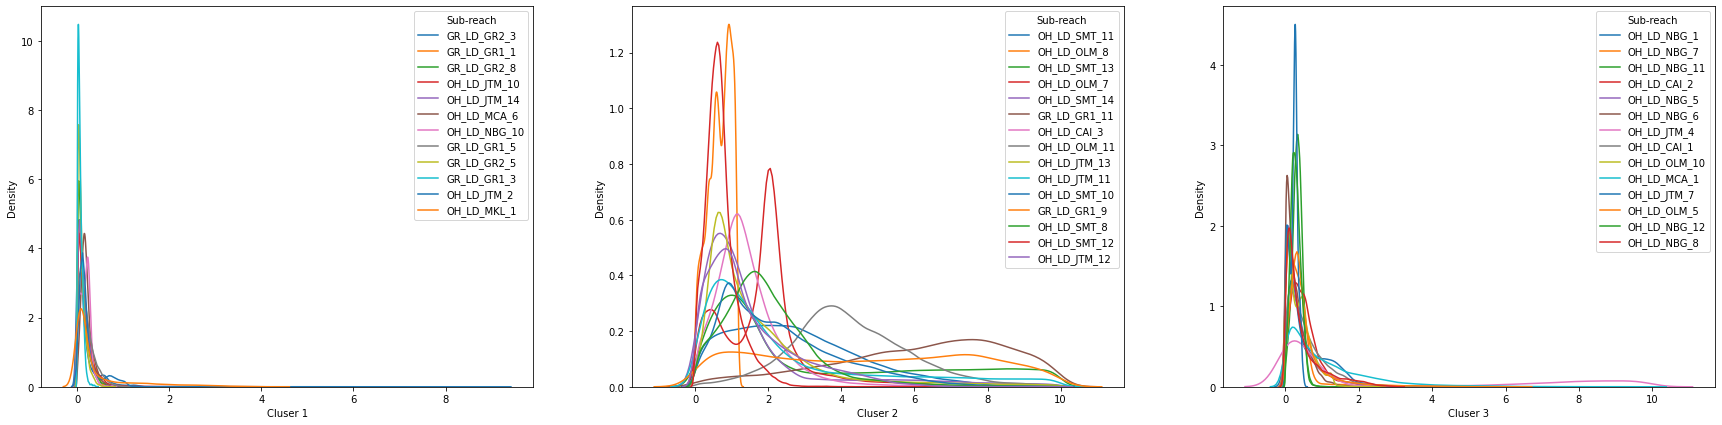

In [70]:
fig, axs = plt.subplots(1,3, figsize=(30, 7), facecolor='w', edgecolor='k')
# fig1.subplots_adjust(hspace = .5, wspace=.001)
# axs1 = axs1.ravel()

# fig2, axs2 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
# fig2.subplots_adjust(hspace = .5, wspace=.001)
# axs2 = axs2.ravel()

data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)

    # with 0 and negative value
    # axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 10)
    # without 0 and negative value
    pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
    # axs2[i - 1].hist(pro_data, bins = 10000)

    # hist, edges = locate_data_to_hist(pro_data)
    subreach_name = re.split('/|_avg_max_min.csv', f)[-2]

    if subreach_name in cluster_label[cluster_label['cos_cluster'] == 0]['subreach_name'].values:
        fig1 = sns.kdeplot(pro_data, ax = axs[0])
    elif subreach_name in cluster_label[cluster_label['cos_cluster'] == 1]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[1])
    elif subreach_name in cluster_label[cluster_label['cos_cluster'] == 2]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[2])
    else:
        print(f)

axs[0].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['cos_cluster'] == 0]['subreach_name'].values)
axs[0].set(xlabel='Cluser 1')

axs[1].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['cos_cluster'] == 1]['subreach_name'].values)
axs[1].set(xlabel='Cluser 2')

axs[2].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['cos_cluster'] == 2]['subreach_name'].values)
axs[2].set(xlabel='Cluser 3')

plt.show()

# js_cluster

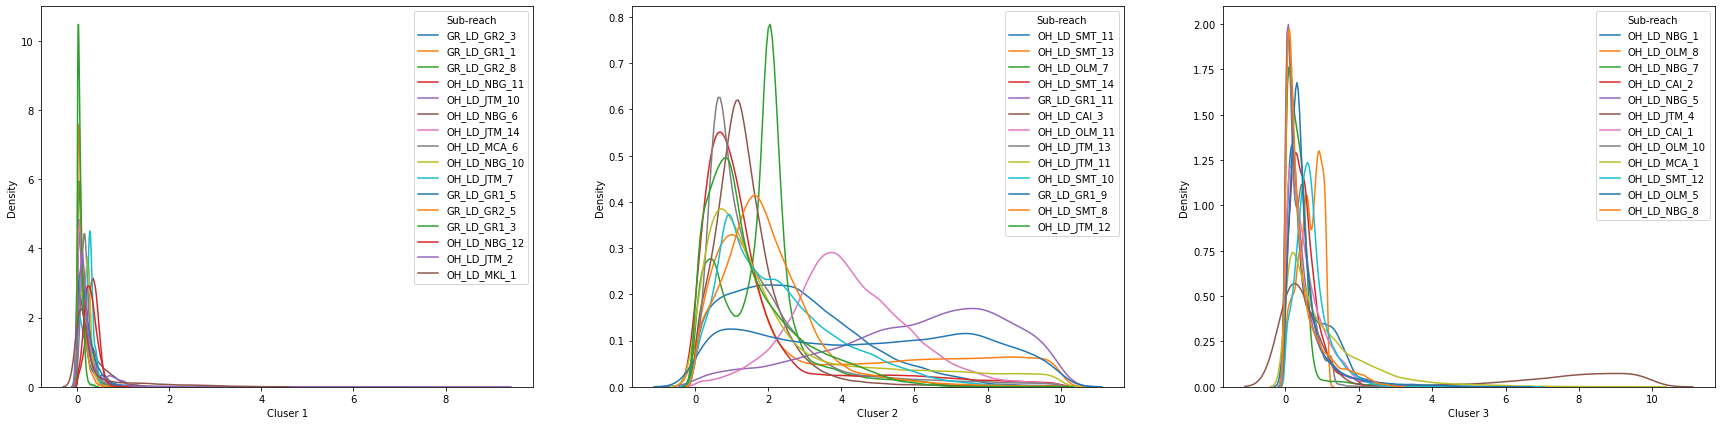

In [71]:
fig, axs = plt.subplots(1,3, figsize=(30, 7), facecolor='w', edgecolor='k')
# fig1.subplots_adjust(hspace = .5, wspace=.001)
# axs1 = axs1.ravel()

# fig2, axs2 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
# fig2.subplots_adjust(hspace = .5, wspace=.001)
# axs2 = axs2.ravel()

data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)

    # with 0 and negative value
    # axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 10)
    # without 0 and negative value
    pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
    # axs2[i - 1].hist(pro_data, bins = 10000)

    # hist, edges = locate_data_to_hist(pro_data)
    subreach_name = re.split('/|_avg_max_min.csv', f)[-2]
    if subreach_name in cluster_label[cluster_label['js_cluster'] == 0]['subreach_name'].values:
        fig1 = sns.kdeplot(pro_data, ax = axs[0])
    elif subreach_name in cluster_label[cluster_label['js_cluster'] == 1]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[1])
    elif subreach_name in cluster_label[cluster_label['js_cluster'] == 2]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[2])


axs[0].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['js_cluster'] == 0]['subreach_name'].values)
axs[0].set(xlabel='Cluser 1')

axs[1].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['js_cluster'] == 1]['subreach_name'].values)
axs[1].set(xlabel='Cluser 2')

axs[2].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['js_cluster'] == 2]['subreach_name'].values)
axs[2].set(xlabel='Cluser 3')

plt.show()

# wb_cluster

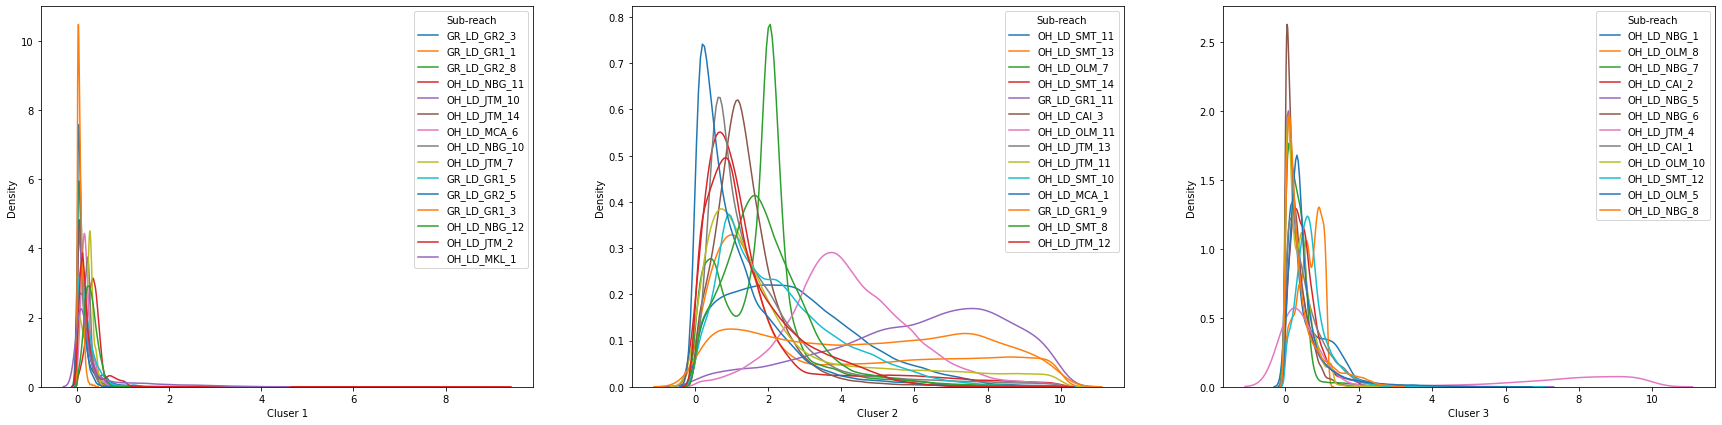

In [72]:
fig, axs = plt.subplots(1,3, figsize=(30, 7), facecolor='w', edgecolor='k')
# fig1.subplots_adjust(hspace = .5, wspace=.001)
# axs1 = axs1.ravel()

# fig2, axs2 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
# fig2.subplots_adjust(hspace = .5, wspace=.001)
# axs2 = axs2.ravel()
subreach_name in cluster_label[cluster_label['cos_cluster'] == 2]['subreach_name'].values
data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)

    # with 0 and negative value
    # axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 10)
    # without 0 and negative value
    pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
    # axs2[i - 1].hist(pro_data, bins = 10000)

    # hist, edges = locate_data_to_hist(pro_data)
    subreach_name = re.split('/|_avg_max_min.csv', f)[-2]
    if subreach_name in cluster_label[cluster_label['wb_cluster'] == 0]['subreach_name'].values:
        fig1 = sns.kdeplot(pro_data, ax = axs[0])
    elif subreach_name in cluster_label[cluster_label['wb_cluster'] == 1]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[1])
    elif subreach_name in cluster_label[cluster_label['wb_cluster'] == 2]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[2])


axs[0].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['wb_cluster'] == 0]['subreach_name'].values)
axs[0].set(xlabel='Cluser 1')

axs[1].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['wb_cluster'] == 1]['subreach_name'].values)
axs[1].set(xlabel='Cluser 2')

axs[2].legend(title='Sub-reach', loc='upper right', labels=cluster_label[cluster_label['wb_cluster'] == 2]['subreach_name'].values)
axs[2].set(xlabel='Cluser 3')

plt.show()
